In [1]:
import pandas as pd
import pickle
!git clone https://github.com/wshuyi/demo_traffic_jam_prediction.git

Cloning into 'demo_traffic_jam_prediction'...
remote: Enumerating objects: 9, done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 9
Unpacking objects: 100% (9/9), done.


In [2]:
from pathlib import Path
data_dir = Path('demo_traffic_jam_prediction')
with open(data_dir / 'data.pickle', 'rb') as f:
    [event_dict, df] = pickle.load(f)

In [3]:
event_dict

{1: 'road closed due to construction',
 2: 'traffic jam',
 3: 'stopped car on the shoulder',
 4: 'road closed',
 5: 'other',
 6: 'object on roadway',
 7: 'major event',
 8: 'pothole',
 9: 'traffic heavier than normal',
 10: 'road construction',
 11: 'fog',
 12: 'accident',
 13: 'slowdown',
 14: 'stopped car',
 15: 'small traffic jam',
 16: 'stopped traffic',
 17: 'heavy traffic',
 18: 'minor accident',
 19: 'medium traffic jam',
 20: 'malfunctioning traffic light',
 21: 'missing sign on the shoulder',
 22: 'animal on the shoulder',
 23: 'animal struck',
 24: 'large traffic jam',
 25: 'hazard on the shoulder',
 26: 'hazard on road',
 27: 'ice on roadway',
 28: 'weather hazard',
 29: 'flooding',
 30: 'road closed due to hazard',
 31: 'hail',
 32: 'huge traffic jam'}

In [4]:
df.head(10)

,label,events
0,1,"[traffic heavier than normal, heavy traffic, m..."
1,1,"[traffic jam, road construction, stopped car o..."
2,1,[traffic jam]
3,1,[traffic jam]
4,1,"[traffic jam, traffic jam, traffic jam, traffi..."
5,1,"[stopped car on the shoulder, traffic jam, hea..."
6,1,"[stopped car on the shoulder, traffic jam, hea..."
7,1,"[traffic jam, small traffic jam, traffic jam, ..."
8,1,"[heavy traffic, traffic jam, traffic jam, stop..."
9,1,"[heavy traffic, traffic jam, traffic jam, stop..."


In [5]:
df.tail(10)

,label,events
851,0,"[traffic jam, traffic jam, traffic jam]"
852,0,"[stopped traffic, traffic jam, stopped traffic]"
853,0,"[stopped car on the shoulder, stopped traffic,..."
854,0,[stopped traffic]
855,0,"[stopped car on the shoulder, stopped car on t..."
856,0,"[heavy traffic, heavy traffic, heavy traffic, ..."
857,0,"[traffic jam, traffic jam]"
858,0,"[traffic jam, traffic jam, traffic heavier tha..."
859,0,"[heavy traffic, stopped car on the shoulder, t..."
860,0,"[heavy traffic, stopped car on the shoulder, s..."


In [6]:
max_len_event_id = df.events.apply(len).idxmax()
max_len_event_id

105

In [7]:
max_len_event = df.iloc[max_len_event_id]
max_len_event.events

['stopped car on the shoulder',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'slowdown',
 'stopped traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'traffic heavier than normal',
 'stopped car on the shoulder',
 'traffic jam',
 'heavy traffic',
 'stopped traffic',
 'stopped traffic',
 'stopped traffic',
 'heavy traffic',
 'traffic jam',
 'stopped car on the shoulder',
 'stopped traffic',
 'stopped traffic',
 'stopped traffic',
 'heavy traffic',
 'traffic heavier than normal',
 'traffic heavier than normal',
 'traffic heavier than normal',
 'traffic heavier than normal',
 'heavy traffic',
 'stopped traffic',
 'traffic heavier than normal',
 'pothole',
 'stopped car on the shoulder',
 'traffic jam',
 'slowdown',
 'stopped traffic',
 'heavy traffic',
 'traffic heavier than normal',
 'traffic jam',
 'traffic jam',
 'stopped car on the shoulder',
 'major event',
 'traffic jam',
 'traffic jam',
 'stopped traffic',
 'heavy traffic',
 'traffic heavie

In [8]:
maxlen = len(max_len_event.events)
maxlen

84

In [10]:
reversed_dict = {}
for k, v in event_dict.items():
  reversed_dict[v] = k
reversed_dict

{'accident': 12,
 'animal on the shoulder': 22,
 'animal struck': 23,
 'flooding': 29,
 'fog': 11,
 'hail': 31,
 'hazard on road': 26,
 'hazard on the shoulder': 25,
 'heavy traffic': 17,
 'huge traffic jam': 32,
 'ice on roadway': 27,
 'large traffic jam': 24,
 'major event': 7,
 'malfunctioning traffic light': 20,
 'medium traffic jam': 19,
 'minor accident': 18,
 'missing sign on the shoulder': 21,
 'object on roadway': 6,
 'other': 5,
 'pothole': 8,
 'road closed': 4,
 'road closed due to construction': 1,
 'road closed due to hazard': 30,
 'road construction': 10,
 'slowdown': 13,
 'small traffic jam': 15,
 'stopped car': 14,
 'stopped car on the shoulder': 3,
 'stopped traffic': 16,
 'traffic heavier than normal': 9,
 'traffic jam': 2,
 'weather hazard': 28}

In [12]:
def map_event_list_to_idxs(event_list):
  list_idxs = []
  for event in (event_list):
    idx = reversed_dict[event]
    list_idxs.append(idx)
  return list_idxs
map_event_list_to_idxs(max_len_event.events)


[3,
 17,
 17,
 17,
 13,
 16,
 17,
 17,
 17,
 17,
 9,
 3,
 2,
 17,
 16,
 16,
 16,
 17,
 2,
 3,
 16,
 16,
 16,
 17,
 9,
 9,
 9,
 9,
 17,
 16,
 9,
 8,
 3,
 2,
 13,
 16,
 17,
 9,
 2,
 2,
 3,
 7,
 2,
 2,
 16,
 17,
 9,
 3,
 13,
 17,
 17,
 3,
 2,
 13,
 13,
 17,
 3,
 17,
 18,
 3,
 17,
 3,
 17,
 16,
 17,
 9,
 17,
 3,
 9,
 16,
 17,
 17,
 17,
 3,
 13,
 16,
 17,
 3,
 9,
 17,
 18,
 7,
 3,
 3]

In [13]:
import numpy as np
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [14]:
len(event_dict)

32

In [15]:
df.events.apply(map_event_list_to_idxs)

0      [9, 17, 18, 14, 13, 17, 3, 13, 16, 3, 17, 17, ...
1                                             [2, 10, 3]
2                                                    [2]
3                                                    [2]
4                               [2, 2, 2, 2, 2, 2, 2, 9]
                             ...                        
856                    [17, 17, 17, 2, 3, 2, 2, 2, 2, 2]
857                                               [2, 2]
858                                  [2, 2, 9, 17, 2, 2]
859                            [17, 3, 2, 2, 2, 2, 2, 2]
860    [17, 3, 3, 17, 3, 17, 2, 3, 18, 14, 3, 3, 16, ...
Name: events, Length: 1722, dtype: object

In [16]:
sequences = df.events.apply(map_event_list_to_idxs).tolist()
sequences[:5]

[[9,
  17,
  18,
  14,
  13,
  17,
  3,
  13,
  16,
  3,
  17,
  17,
  16,
  3,
  16,
  17,
  9,
  17,
  2,
  17,
  2,
  7,
  16,
  17,
  17,
  17,
  17,
  13,
  5,
  17,
  9,
  9,
  16,
  16,
  3],
 [2, 10, 3],
 [2],
 [2],
 [2, 2, 2, 2, 2, 2, 2, 9]]

The first row is much longer than the following ones. However, to apply a sequence model on the data, we need to make sure all the input sequences share the same length. Hence, we use the length of the longest sequence as the max length, and fill other shorter sequences with 0s from the beginning.

In [17]:
data = pad_sequences(sequences, maxlen=maxlen)
data

array([[ 0,  0,  0, ..., 16, 16,  3],
       [ 0,  0,  0, ...,  2, 10,  3],
       [ 0,  0,  0, ...,  0,  0,  2],
       ...,
       [ 0,  0,  0, ..., 17,  2,  2],
       [ 0,  0,  0, ...,  2,  2,  2],
       [ 0,  0,  0, ...,  3,  3,  2]], dtype=int32)

In [18]:
labels = np.array(df.label)

In [19]:
np.random.seed(12)

We shuffle the sequences along with their corresponding labels.as we are done with the running of the code so we can make changes

In [20]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

The training set will contain 80% of the data, while the other 20% goes into the validation set.

In [21]:
training_samples = int(len(indices) * .8)
validation_samples = len(indices) - training_samples

The following codes divide the data into training and validation sets, along with the labels.

In [22]:
X_train = data[:training_samples]
y_train = labels[:training_samples]
X_valid = data[training_samples: training_samples + validation_samples]
y_valid = labels[training_samples: training_samples + validation_samples]

In [23]:
X_train

array([[ 0,  0,  0, ..., 15, 15,  3],
       [ 0,  0,  0, ...,  0,  2,  2],
       [ 0,  0,  0, ...,  0,  0, 16],
       ...,
       [ 0,  0,  0, ...,  2, 15, 16],
       [ 0,  0,  0, ...,  2,  2,  2],
       [ 0,  0,  0, ...,  0,  0,  2]], dtype=int32)

as we filled the sequences with 0 as padding value, now we have 33, instead of 32 event types.

So the number of event types will be set to 33. here we add +1

In [24]:
num_events = len(event_dict) + 1

If we simply put the numbers into classification model, it will regard each number as a continuous value. However, they are not. So we will let the numbers go through an Embedding layer, and convert each number (representing a certain type of event) into a vector. Each vector, will contain 20 scalars.

In [25]:
embedding_dim = 20

In [26]:
#The initial embedding matrix will be generated randomly.
embedding_matrix = np.random.rand(num_events, embedding_dim)

Finally, we can build a model now. We use the Sequential model in Keras, and put different layers one by one, as we play with legos. The first layer is Embedding Layer, then a LSTM Layer follows, the last layer is a dense one, whose activation function is sigmoid, to make binary classification.

In [28]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units))
model.add(Dense(1, activation='sigmoid'))

The next step is to handle the parameters in the Embedding layer. For now, we just load in the initial embedding matrix generated randomly, and won’t let the training process change the weights in Embedding Layer.

In [29]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [30]:
#Then, we train the model, and save the model into a h5 file.
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("mymodel_embedding_untrainable.png")

Train on 1377 samples, validate on 345 samples
Epoch 1/50
1377/1377 [==============================] - 2s 2ms/step - loss: 0.6757 - acc: 0.5824 - val_loss: 0.6894 - val_acc: 0.5130
Epoch 2/50
1377/1377 [==============================] - 2s 1ms/step - loss: 0.6561 - acc: 0.6224 - val_loss: 0.6554 - val_acc: 0.6522
Epoch 3/50
1377/1377 [==============================] - 2s 1ms/step - loss: 0.6305 - acc: 0.6543 - val_loss: 0.6553 - val_acc: 0.5942
Epoch 4/50
1377/1377 [==============================] - 2s 1ms/step - loss: 0.6107 - acc: 0.6718 - val_loss: 0.6614 - val_acc: 0.6000
Epoch 5/50
1377/1377 [==============================] - 2s 1ms/step - loss: 0.5970 - acc: 0.6819 - val_loss: 0.6178 - val_acc: 0.6522
Epoch 6/50
1377/1377 [==============================] - 2s 1ms/step - loss: 0.5853 - acc: 0.6834 - val_loss: 0.6083 - val_acc: 0.6522
Epoch 7/50
1377/1377 [==============================] - 2s 1ms/step - loss: 0.5749 - acc: 0.7044 - val_loss: 0.5787 - val_acc: 0.6899
Epoch 8/50
1377

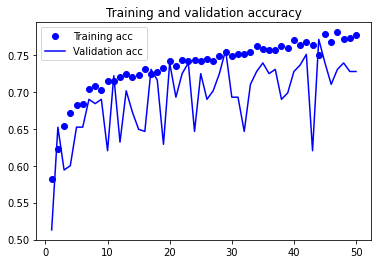

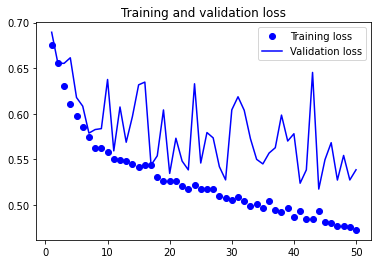

In [31]:
#After the model is trained, let us visualize the curves of accuracy and loss with matplotlib.
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

As you can see, it is not bad. If we use a dummy model to predict everything as label 0 (or all as 1), the accuracy will stay at 0.50. So our model, apparently, has captured some pattern, and out-performed the dummy one. However, it is very unstable.

LOSS :------------------- As you may find out, it is not good. When the loss of training went down, the loss on validation set bumped, and there is no significant trend of convergence. It is more important to find out the reason.

Note that we used a randomly initialized Embedding Matrix which stayed static during the training phase. It may lead us into trouble.

So next step, we can do an experiment to allow the Embedding layer be trained and adjusted.

HERE WE JUST SET IT AS TRUE

In [32]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units))
model.add(Dense(1, activation='sigmoid'))

In [33]:
#The only different in the code, is that parameter trainable was set to True.
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

In [34]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("mymodel_embedding_trainable.png")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1377 samples, validate on 345 samples
Epoch 1/50
1377/1377 [==============================] - 2s 2ms/step - loss: 0.6733 - acc: 0.5730 - val_loss: 0.6653 - val_acc: 0.5536
Epoch 2/50
1377/1377 [==============================] - 2s 1ms/step - loss: 0.6357 - acc: 0.6616 - val_loss: 0.6728 - val_acc: 0.5362
Epoch 3/50
1377/1377 [==============================] - 2s 1ms/step - loss: 0.6022 - acc: 0.6935 - val_loss: 0.6668 - val_acc: 0.6000
Epoch 4/50
1377/1377 [==============================] - 2s 1ms/step - loss: 0.5763 - acc: 0.7102 - val_loss: 0.6025 - val_acc: 0.6522
Epoch 5/50
1377/1377 [==============================] - 2s 1ms/step - loss: 0.5551 - acc: 0.7277 - val_loss: 0.5777 - val_acc: 0.6841
Epoch 6/50
1377/1377 [==============================] - 2s 1ms/step - loss: 0.5394 - acc: 0.7335 - val_loss: 0.5998 - val_acc: 0.6783
Epoch 7/50
1377/1377 [==============================] - 2s 1ms/step - loss: 0.5341 - acc: 0.7436 - val_loss: 0.5563 - val_acc: 0.7043
Epoch 8/50
1377

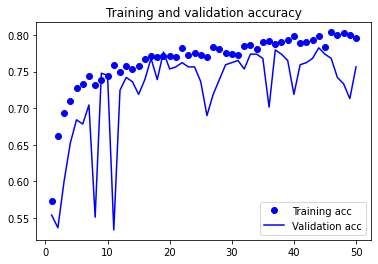

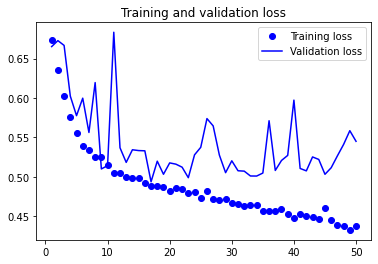

In [35]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

As you can see, it got better. The fluctuation of validation accuracy curve went down, while the validation accuracy got higher than 0.75. This model is, to some extent, more valuable.

In [36]:
#We will add two parameters related with Dropouts. To do this, we use dropout=0.2, recurrent_dropout=0.2 when defining the LSTM layer.
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [37]:
#We will keep the parameter trainable of Embedding Layer to True.
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

In [38]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("mymodel_embedding_trainable_with_dropout.h5")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1377 samples, validate on 345 samples
Epoch 1/50
1377/1377 [==============================] - 3s 2ms/step - loss: 0.6818 - acc: 0.5519 - val_loss: 0.6838 - val_acc: 0.5565
Epoch 2/50
1377/1377 [==============================] - 2s 2ms/step - loss: 0.6670 - acc: 0.5926 - val_loss: 0.6718 - val_acc: 0.5768
Epoch 3/50
1377/1377 [==============================] - 2s 2ms/step - loss: 0.6521 - acc: 0.6216 - val_loss: 0.6493 - val_acc: 0.6377
Epoch 4/50
1377/1377 [==============================] - 2s 2ms/step - loss: 0.6347 - acc: 0.6456 - val_loss: 0.6285 - val_acc: 0.6696
Epoch 5/50
1377/1377 [==============================] - 2s 2ms/step - loss: 0.6296 - acc: 0.6478 - val_loss: 0.6258 - val_acc: 0.6406
Epoch 6/50
1377/1377 [==============================] - 2s 2ms/step - loss: 0.6089 - acc: 0.6703 - val_loss: 0.5990 - val_acc: 0.6870
Epoch 7/50
1377/1377 [==============================] - 2s 2ms/step - loss: 0.5912 - acc: 0.6718 - val_loss: 0.5795 - val_acc: 0.6899
Epoch 8/50
1377

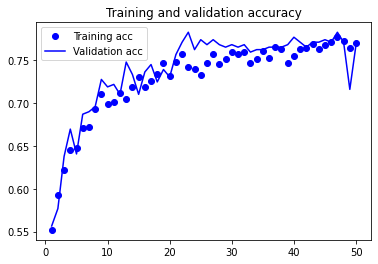

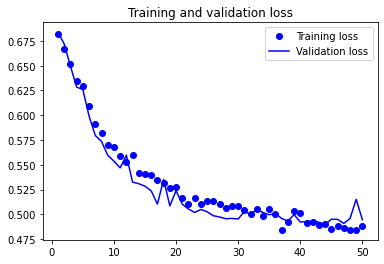

In [39]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

when you look into the curve of loss, you’ll see significant improvement.

The curve of validation loss is smoother, and much closer to the trend of training loss. Over-fitting has been taken care of, and the model is now more stable and generalizable to unseen data. The Traffic Administration can then use the model to predict the happening of severe traffic volume with the waze open data of incidents report. The expectation of model accuracy is about 75%.